# **Customer Churn Prediction for banking sector**

Customer churn prediction predicts the likelihood of customers canceling a company’s products or services.This approach requires the organization to know and understand their client’s behavior and the attributes that lead to the risk of the client leaving.

### **Importing**

In [3]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.9 MB/s eta 0:00:00


In [26]:
import numpy as np # linear algebra
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

### **Load Dataset**

In [5]:
df = pd.read_csv('churn_prediction.csv')
df.sample(25)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
22385,23884,1397,63,Male,0.0,salaried,394.0,3,762,6478.17,...,5617.22,4989.40,650.34,571.77,0.34,0.34,5850.58,5620.00,0,2019-12-31
18776,20041,2144,55,Male,0.0,salaried,1096.0,3,249,742.76,...,2356.58,5763.75,0.67,0.67,0.67,0.67,742.76,742.76,1,2019-10-25
3246,3458,2225,60,Female,0.0,self_employed,11.0,2,121,2159.13,...,2159.13,1114.51,0.50,0.50,0.50,0.50,2159.13,2159.13,1,2019-09-24
10069,10747,2155,32,Male,0.0,salaried,1020.0,2,114,38216.14,...,13599.45,6357.83,30161.01,15164.67,4095.76,3686.93,24788.92,10934.54,0,2019-12-19
3180,3389,2112,37,Male,0.0,self_employed,1096.0,2,92,6473.48,...,5708.08,11446.79,494.59,50281.99,974.16,96338.09,6911.61,6086.61,0,2019-12-24
2352,2518,2132,39,Female,0.0,self_employed,905.0,2,606,4451.95,...,1464.69,939.41,3803.85,859.13,21.70,285.99,3448.01,318.52,0,2019-12-26
26326,28110,2210,54,Female,0.0,self_employed,1438.0,2,151,23112.48,...,18891.14,3270.41,0.44,0.44,654.73,893.76,21985.41,20916.90,1,2019-10-23
21618,23057,2236,60,Female,0.0,self_employed,146.0,3,1759,3764.10,...,2551.49,1402.30,0.14,0.14,168.53,572.41,2963.59,2209.48,0,NaT
9735,10388,1751,30,Male,0.0,salaried,491.0,3,707,8382.71,...,8135.92,8025.16,653.70,85.84,1287.19,441.67,8327.39,8143.53,0,2019-12-28
24027,25641,2214,52,Male,0.0,salaried,1294.0,2,150,3143.49,...,2245.46,218.66,0.63,0.63,0.63,0.63,2177.97,2468.83,1,2019-04-15


In [6]:
df.isnull().sum()

,0
customer_id,0
vintage,0
age,0
gender,525
dependents,2463
occupation,80
city,803
customer_nw_category,0
branch_code,0
current_balance,0


In [7]:
df['age'].fillna(df['age'].median(), inplace=True)
df['current_balance'].fillna(df['current_balance'].mean(), inplace=True)
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['city'].replace(np.nan, '0', inplace=True)
df['dependents'].fillna(df['age'].mode()[0], inplace=True)

In [8]:
df.isnull().sum()

,0
customer_id,0
vintage,0
age,0
gender,0
dependents,0
occupation,0
city,0
customer_nw_category,0
branch_code,0
current_balance,0


In [10]:
df['city'] = pd.to_numeric(df['city'], errors='coerce')

### **Label Encoding for categoricals columns**

In [11]:
le = LabelEncoder()
cat_cols = ['gender', 'occupation','city', 'last_transaction']
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
df.dtypes

,0
customer_id,int64
vintage,int64
age,int64
gender,int64
dependents,float64
occupation,int64
city,int64
customer_nw_category,int64
branch_code,int64
current_balance,float64


In [12]:
X = df.drop(['churn', 'customer_id'], axis=1)
y = df['churn']

<Figure size 1200x800 with 0 Axes>

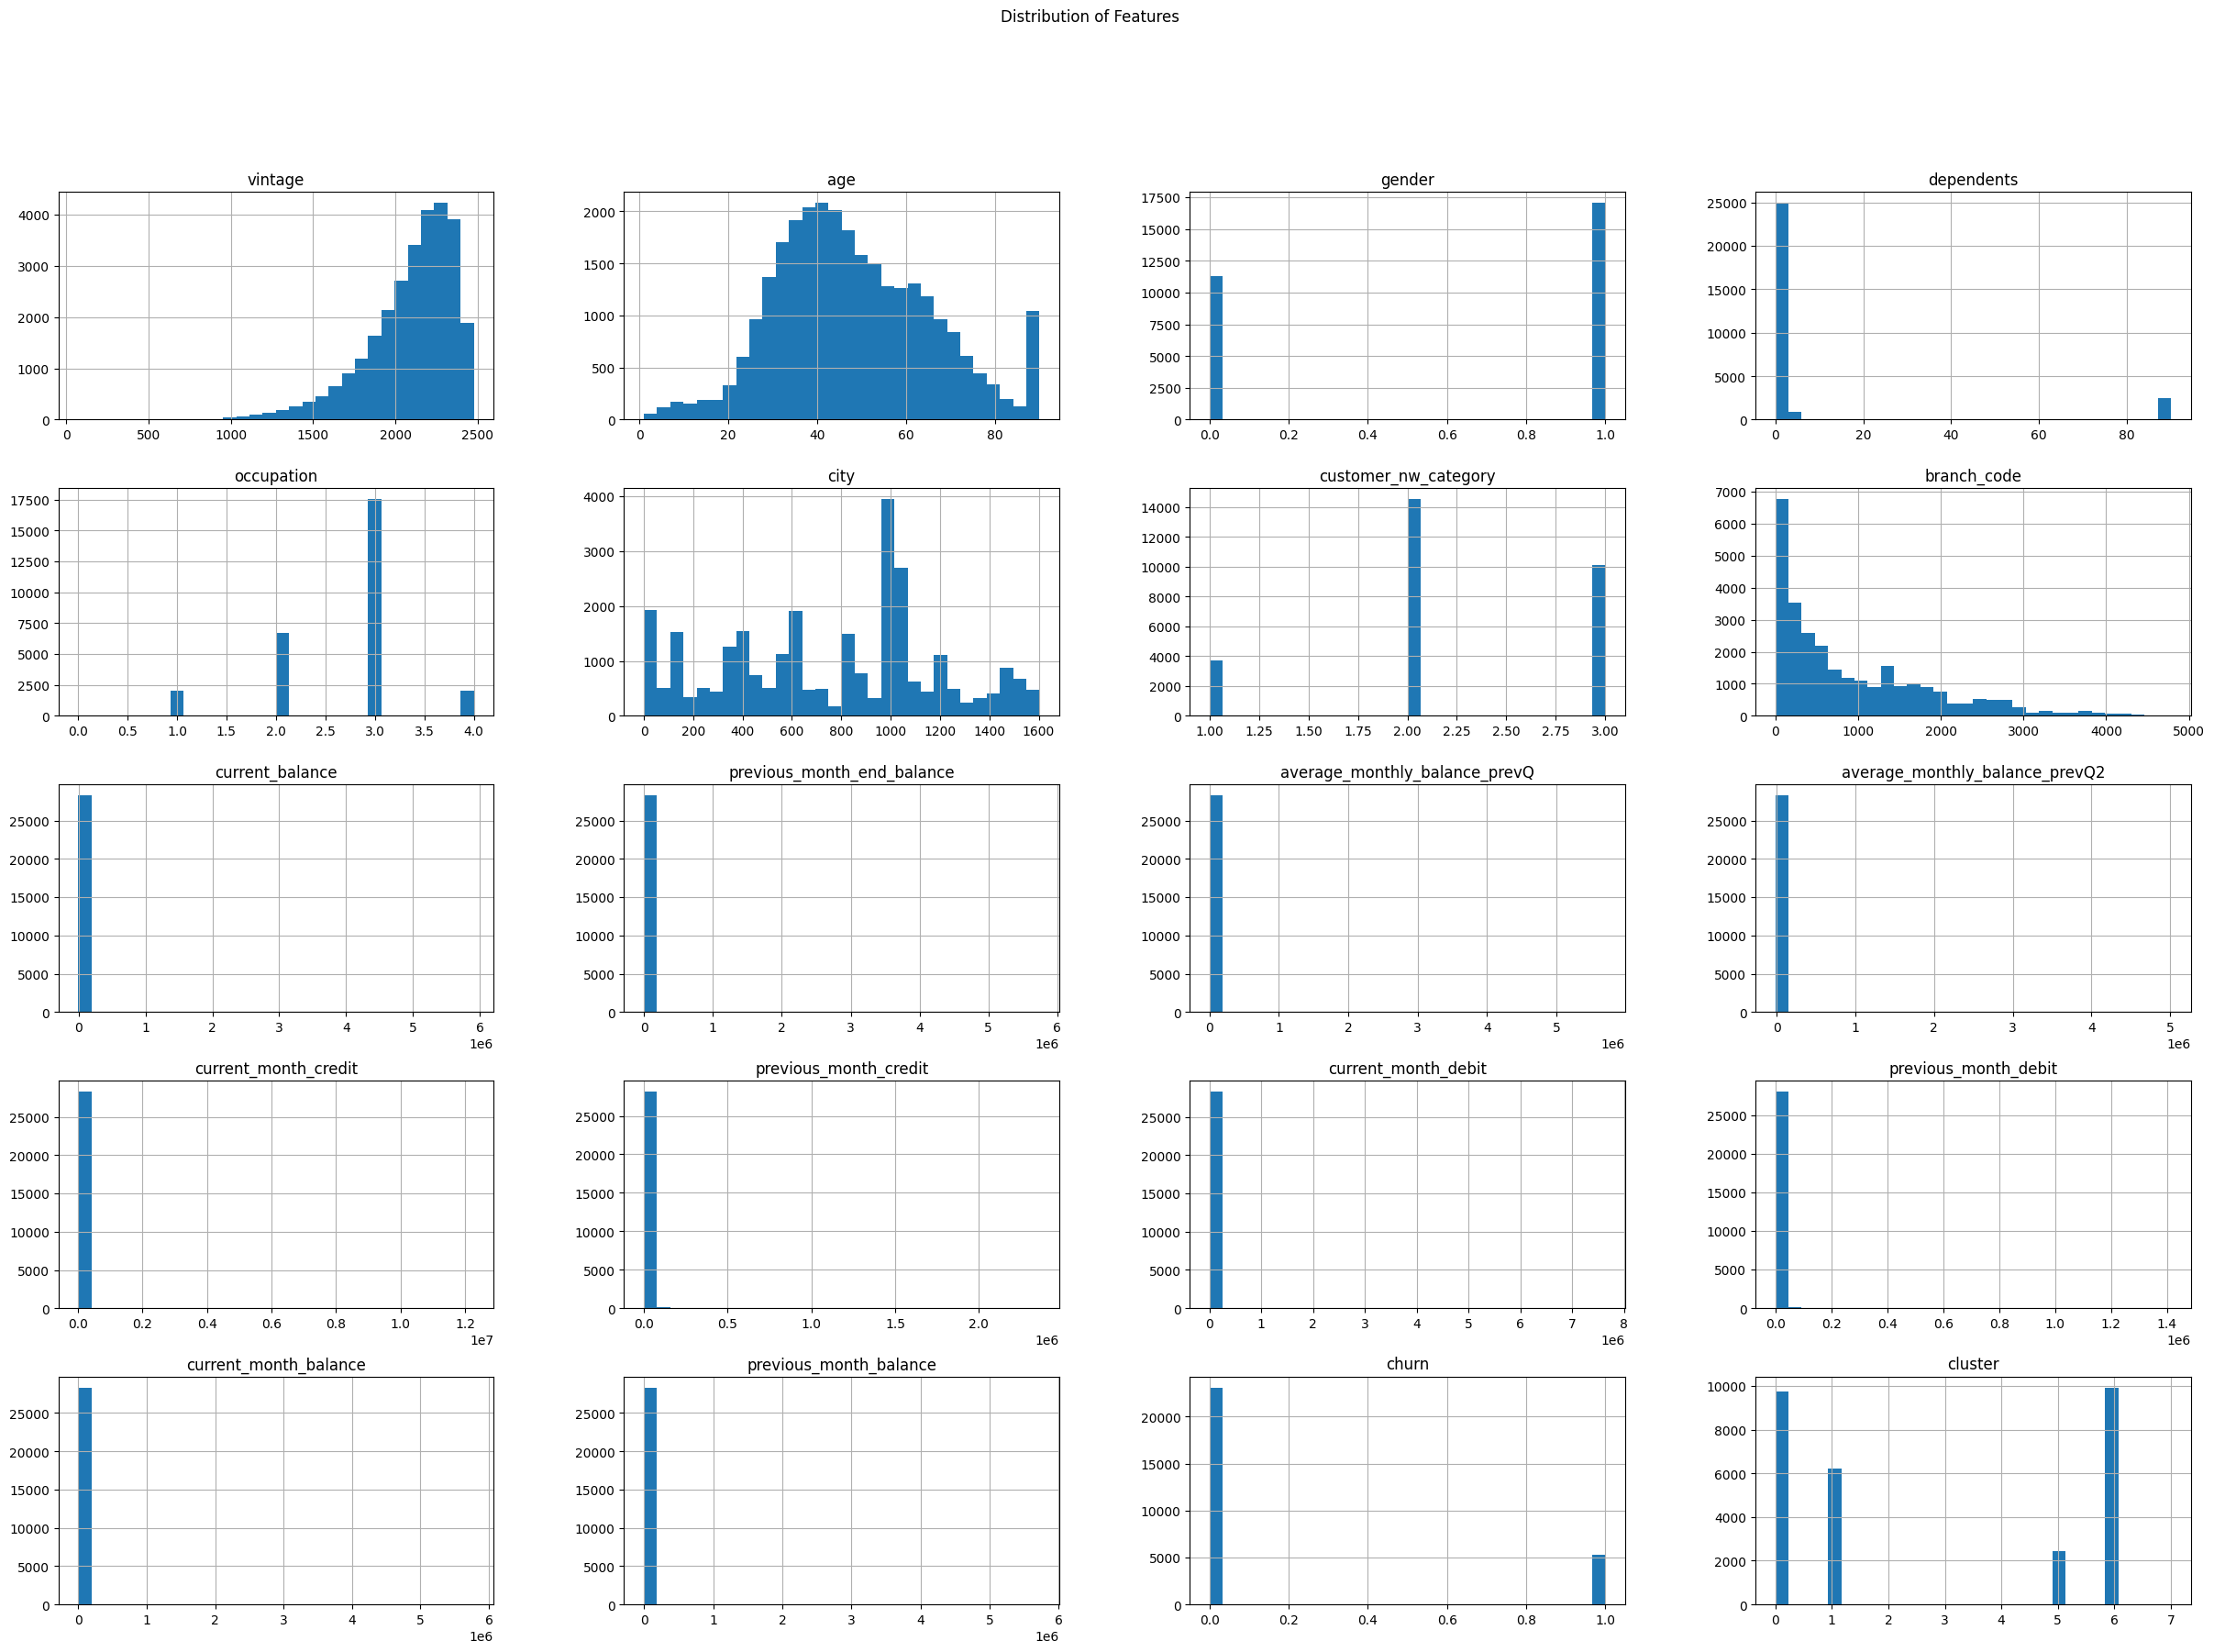

In [33]:
plt.figure(figsize=(12, 8))
df.drop(['customer_id', 'last_transaction'], axis=1).hist(bins=30, figsize=(30, 20))
plt.suptitle('Distribution of Features')
plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = [
    ("Decision Tree", DecisionTreeClassifier()),
    ("CatBoost", CatBoostClassifier(verbose=0)),
    ("XGBoost", XGBClassifier()),
    ("SVM", SVC()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("K-Nearest Neighbors", KNeighborsClassifier()),
    ("Naive Bayes", GaussianNB()),
    ("Logistic Regression", LogisticRegression()),
    ("Neural Network", MLPClassifier(max_iter=1000)),
]


for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print("Confusion Matrix:")
    print(confusion)
    print("\n")

Model: Decision Tree
Accuracy: 0.7968997710058129
Confusion Matrix:
[[4053  586]
 [ 567  471]]


Model: CatBoost
Accuracy: 0.865421877752334
Confusion Matrix:
[[4460  179]
 [ 585  453]]


Model: XGBoost
Accuracy: 0.8618988902589396
Confusion Matrix:
[[4415  224]
 [ 560  478]]


Model: SVM
Accuracy: 0.8231460278316012
Confusion Matrix:
[[4617   22]
 [ 982   56]]


Model: Gradient Boosting
Accuracy: 0.8648934296283248
Confusion Matrix:
[[4471  168]
 [ 599  439]]


Model: Random Forest
Accuracy: 0.8671833714990311
Confusion Matrix:
[[4478  161]
 [ 593  445]]


Model: K-Nearest Neighbors
Accuracy: 0.843403205918619
Confusion Matrix:
[[4417  222]
 [ 667  371]]


Model: Naive Bayes
Accuracy: 0.814514708472785
Confusion Matrix:
[[4592   47]
 [1006   32]]




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.8300158534437203
Confusion Matrix:
[[4612   27]
 [ 938  100]]


Model: Neural Network
Accuracy: 0.843403205918619
Confusion Matrix:
[[4382  257]
 [ 632  406]]




### **Apply PCA (Principal Analysis Component)**

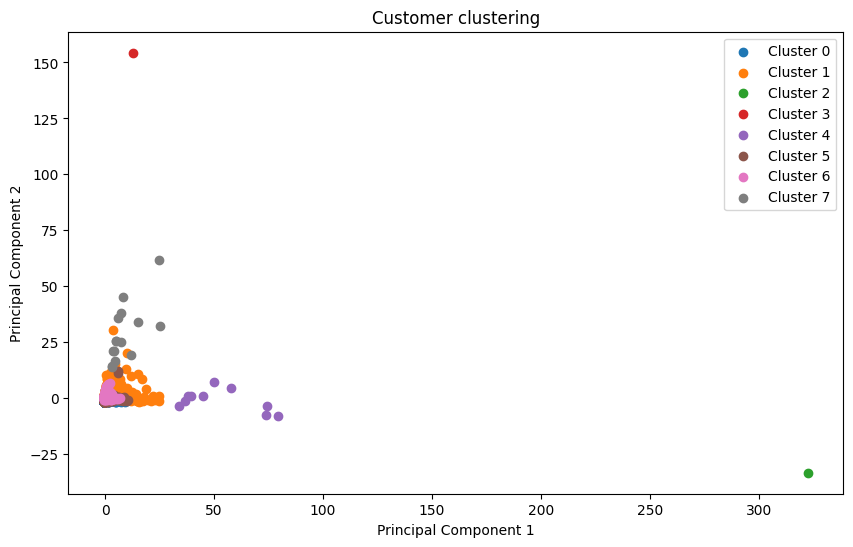

In [21]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#Standardize your data (optional but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(['customer_id', 'last_transaction'], axis=1))

#Train the K-Means model with the desired number of clusters and set the random_state.
k = 8  # Número de clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

#Add the cluster labels to your data.
df['cluster'] = kmeans.labels_

# Using PCA as an example and setting the random_state.
pca = PCA(n_components=5, random_state=7)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
for i in range(k):
    cluster_data = X_pca[df['cluster'] == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('Customer clustering')
plt.show()

### **Now try Cat Boost Classifier trained with 5 principal components**

In [17]:
# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, df['churn'], test_size=0.2, random_state=42)

# Create and train a CatBoost model
catboost_model = CatBoostClassifier(iterations=1000, depth=6, learning_rate=0.1, loss_function='Logloss', verbose=0)
catboost_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = catboost_model.predict(X_test)

# Calculate the accuracy of the predictions
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9274264576360753
